# Data from Frankefunction

In [43]:
import sys
sys.path.insert(1, '../')


In [44]:
from functions import *
from main import * 

In [45]:
x,y,z = generate_data()

Defining variables next: 

In [46]:
degrees = np.linspace(1,10,10)

bias = np.zeros(len(degrees))
variance = np.zeros(len(degrees))

test_MSE = np.zeros(len(degrees))
test_R2 = np.zeros(len(degrees))

train_MSE = np.zeros(len(degrees))
train_R2 = np.zeros(len(degrees))

Performing 5 fold cross-validation with our 'OLS'.

In [47]:
k = 5 #cross fold
for polygrad in degrees:

    j = int(polygrad) - 1
    scores, betas_OLS = bias_variance(x,y,z,polygrad,k, regressiontype='OLS')

    train_MSE[j] = scores[0]
    train_R2[j] = scores[1]

    test_MSE[j] = scores[2]
    bias[j] = scores[3]
    variance[j] = scores[4]
    if (test_MSE[j]>= (bias[j]+variance[j])):
        print ("Correct: ")
    else :
        print ("MSE is not equal to variance + bias^2 by : {}".format(test_MSE[j]-(bias[j]+variance[j])))
    print('{} >= {} + {} = {}'.format(test_MSE[j],bias[j], variance[j], bias[j]+variance[j]))
    print (" ")

MSE is not equal to variance + bias^2 by : -3.469446951953614e-18
0.02093744946218247 >= 0.02089489337498665 + 4.2556087195821124e-05 = 0.020937449462182473
 
MSE is not equal to variance + bias^2 by : -3.469446951953614e-18
0.018353654470413337 >= 0.018291826118307004 + 6.1828352106337e-05 = 0.01835365447041334
 
Correct: 
0.006643579825476762 >= 0.0065770125449728534 + 6.656728050390717e-05 = 0.006643579825476761
 
Correct: 
0.004731225707207712 >= 0.004591864556948111 + 0.00013936115025960102 = 0.004731225707207712
 
Correct: 
0.0023051383880798317 >= 0.002204461966421855 + 0.0001006764216579764 = 0.0023051383880798313
 
MSE is not equal to variance + bias^2 by : -8.673617379884035e-19
0.0012186449079436435 >= 0.001170011853581132 + 4.8633054362512356e-05 = 0.0012186449079436444
 
Correct: 
0.0008943069856297366 >= 0.0008661991529488398 + 2.8107832680896643e-05 = 0.0008943069856297365
 
MSE is not equal to variance + bias^2 by : -6.505213034913027e-19
0.001329138985413093 >= 0.00118

Here we would like to compare our test and train MSE, and also look at our variance and bias trade-off as a function. 

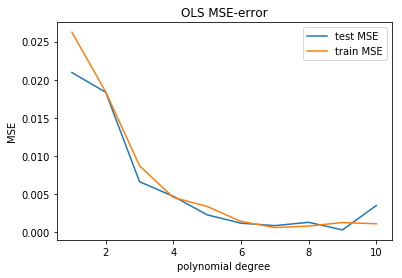

In [48]:
plt.plot(degrees,test_MSE)
plt.plot(degrees,train_MSE)
plt.xlabel("polynomial degree")
plt.ylabel("MSE")
plt.title("OLS MSE-error")
plt.legend(["test MSE","train MSE"])

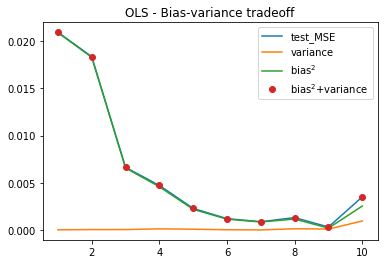

In [49]:
plt.plot(degrees,test_MSE)
plt.plot(degrees,variance)
plt.plot(degrees,bias)
plt.title("OLS - Bias-variance tradeoff")
plt.plot(degrees,variance+bias,'o')
plt.legend(["test_MSE","variance", "bias$^2$","bias$^2$+variance"])    
plt.show()

# Ridge regression

We will do much of the same analysis as we did above, but first we need to check which hyperparameter lambda is best. 

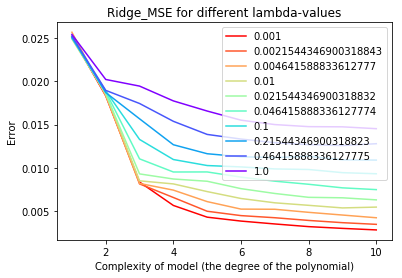

In [50]:
    
nlambdas = 10
lambdas = np.logspace(-3,0,nlambdas)
    
color=iter(cm.rainbow(np.linspace(1,0,nlambdas)))
    
for lamb in lambdas:  
        test2_MSE = Different_Lambdas(x, y, z, degrees, k, lamb, regressiontype='Ridge')       
    
        c = next(color)
        plt.plot(degrees,test2_MSE, c=c)
        plt.legend(lambdas)
        plt.xlabel("Complexity of model (the degree of the polynomial)")
        plt.ylabel("Error")
        plt.title("Ridge_MSE for different lambda-values")
plt.show()

As we can see, the lower the $\lambda$, the better. Thus, we will use $10^{-4}$ as our $\lambda$.

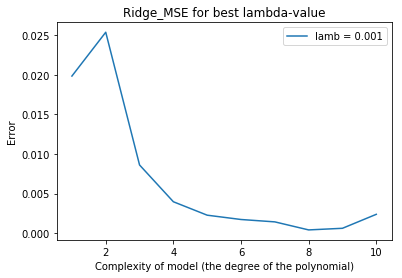

In [51]:
lamb = 1e-5

test_MSE_Ridge, Bias, Variance, beta_Ridge = Best_Lambda(x, y, z, degrees, k, lamb, regressiontype='Ridge')

plt.plot(degrees,test_MSE_Ridge)
plt.legend(["lamb = 0.001"])
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.ylabel("Error")
plt.title("Ridge_MSE for best lambda-value")
plt.show()

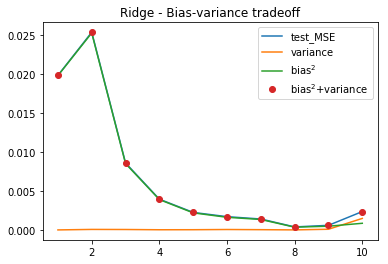

In [52]:
plt.plot(degrees,test_MSE_Ridge)
plt.plot(degrees,Variance)
plt.plot(degrees,Bias)
plt.title("Ridge - Bias-variance tradeoff")
plt.plot(degrees,Variance+Bias,'o')
plt.legend(["test_MSE","variance", "bias$^2$","bias$^2$+variance"])    
plt.show()

# LASSO regression

100%|██████████| 10/10 [00:01<00:00,  5.40it/s]


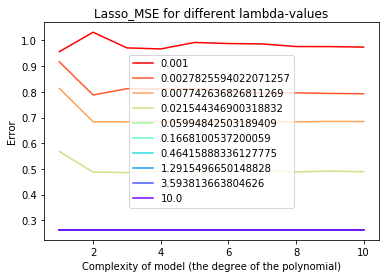

In [53]:
color=iter(cm.rainbow(np.linspace(1,0,nlambdas)))
lambdas = np.logspace(-3,1,nlambdas)

for lamb in tqdm(lambdas):

        test_MSE_LASSO = Different_Lambdas(x, y, z, degrees, k, lamb, regressiontype='Lasso')
        
        c = next(color)
        plt.plot(degrees,test_MSE_LASSO, c=c)
        plt.legend(lambdas)
        plt.xlabel("Complexity of model (the degree of the polynomial)")
        plt.ylabel("Error")
        plt.title("Lasso_MSE for different lambda-values")
plt.show()

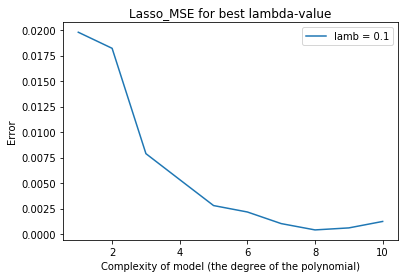

In [54]:
    lamb = 0.1

    test_MSE_LASSO, Bias, Variance, betas_LASSO = Best_Lambda(x, y, z, degrees, k, lamb, regressiontype='Lasso')

    plt.plot(degrees,test_MSE_LASSO)
    plt.legend(["lamb = 0.1"])
    plt.title("Lasso_MSE for best lambda-value")
    plt.xlabel("Complexity of model (the degree of the polynomial)")
    plt.ylabel("Error")
    plt.show()


# What is the best model?

Now we can try to find out which model is the best. A simple plot of the different regression models with the best $\lambda$ functions will do. 

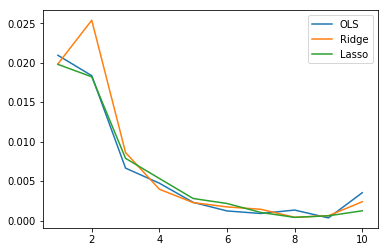

In [59]:
plt.plot(degrees,test_MSE)
plt.plot(degrees,test_MSE_Ridge)
plt.plot(degrees,test_MSE_LASSO)
plt.legend(["OLS","Ridge","Lasso"])
plt.show()

In [ ]:
And we can also find the confidence interval. 

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
for i in np.arange(x.shape[0]):
    blob(x[i],y[i], 0.25, 15, (.1,.2,.8,.5), .2, .2, ax, Nt = 10, blur = .03 )

def confidence_interval(beta, MSE):
    sigma = np.sqrt(MSE)
    mean_beta = 0
    for i in beta:
        mean_beta += i
    print ("confidence interval is from %2.4f to %2.4f." %
            (mean_beta-sigma*1.96, mean_beta+sigma*1.96))

    
plt.plot(x,y, color = (0,0,0))
plt.xlim(x.min(),x.max())
plt.ylim(y.min()-2,y.max()+2)
plt.show()